<a href="https://colab.research.google.com/github/dianakang/helloTensorflow/blob/master/20201216.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.3 세번째 신경망 네트워크 : XOR

## 2.3.1 tf.keras로 신경망 구축

In [61]:
# 여러개의 퍼셉트론 사용
# tf.keras를 사용해 신경망 구축

In [62]:
import tensorflow as tf
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])

# Dense = 완전연결법 : 모든 뉴런이 '레이어(layer)'로 서로 연결된 상태
# units = 레이어를 구성하는 뉴런의 수
# activation = 활성화함수
# input_shape은 첫 번째 레이어에서만 정의함 -> '입력의 차원 수'를 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

# compile = model이 실제로 동작할 수 있도록 준비하는 명령어
# optimizer = 최적화 함수, 딥러닝의 학습식 정의
# SGD = 확률적 경사 하강법 / lr = learning rate(학습율)
# 'mse' = Mean Squared Error(평균제곱오차)
#       = 기대출력에서 실제출력을 뺀 뒤에 '제곱한 값'을 '평균'하는 것
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.4),loss = 'mse')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


## 2.3.2 네트워크 학습시키기

In [63]:
# epochs = 학습횟수 
# batch_size = 한번에 학습시키는 데이터의 수 , 확률적 경사하강법(SGD)에서는 이게 1임.
history = model.fit(x, y, epochs=1000, batch_size=1)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2714
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2705
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2677
Epoch 4/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2691
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2691
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2678
Epoch 7/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2671
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2688
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2687
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2687
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.2684
Epoch 12/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.2671
Epoch 13/1000
4/4 [==============================

## 2.3.3 네트워크 평가 

In [64]:
model.predict(x)

array([[0.08644879],
       [0.93406904],
       [0.93478096],
       [0.05601236]], dtype=float32)

In [65]:
# 첫 번째, 네 번째 값은 0에 가깝고, 두 번째와 세 번째 값은 1에 가까운 XOR 네트워크를 잘 계산하고 있음.
# 이러한 결과가 나오는 이유를 알아보기 위해 model을 구성하고 있는 파라미터, 즉 가중치(w)와 편향(b) 출력해보자!

## 2.3.4 가중치(w)와 편향(b) 출력

In [66]:
# 가중치 정보는 model.weights에 저장되어 있다.
for weight in model.weights:
  print(weight)

<tf.Variable 'dense_6/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-5.72074  , -3.6646984],
       [-5.955662 , -3.6955602]], dtype=float32)>
<tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32, numpy=array([2.1072757, 5.371721 ], dtype=float32)>
<tf.Variable 'dense_7/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-7.561597 ],
       [ 7.1713843]], dtype=float32)>
<tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32, numpy=array([-3.2207766], dtype=float32)>


In [67]:
# 뉴런과 레이어가 많아지면 이 가중치들이 무슨 일을 하는지 한눈에 파악하기가 어려워진다.
# 따라서, '시각화'를 통해 네트워크 학습 상황을 잘 파악할 수 있도록 만든다! 

# 2.4 시각화 기초

## 2.4.1 matplotlib.pyplot을 이용한 그래프 그리기

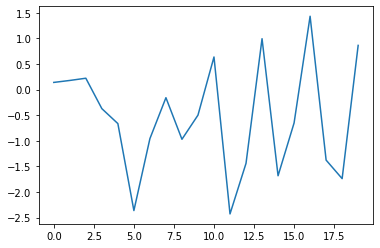

In [68]:
# 꺾은선 그래프
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y) # plt.plot(x,y) = '꺾은선 그래프' 
plt.show()

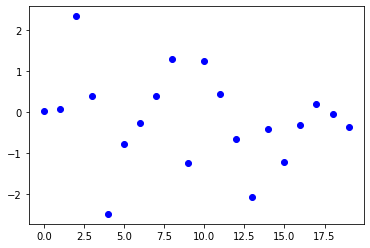

In [69]:
# 점
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y,'bo')  # plt.plot(x,y,'bo') = '점'
plt.show()          # 여기서'bo'부분은 파란색(blue) 점(o)
                    # 선을 나타내고 싶다면 'b-', 점선은 'b--'
                    # 색 표현 = 빨간색(r), 노란색(y), 초록색(g), 검은색(k)

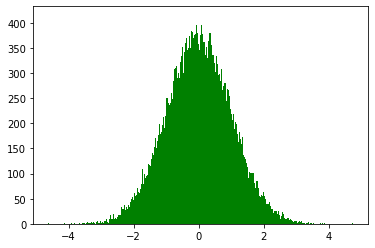

In [70]:
# 히스토그램
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal, bins =1000, color = 'g')    # plt.hist() = '히스토그램'
plt.show()                                          # bins의 수에 따라 그래프의 모양이 달라진다.

## 2.4.2 레이어 XOR 네트워크의 정보 시각화

In [71]:
# 이렇게 측정치(metric)변화량을 통해 학습이 잘 되고 있는지 확인할 수 있다.
# '정확도'를 측정하는 방법인데, 선 그래프를 이용해 손실이 어떻게 변했는지 알아보자!

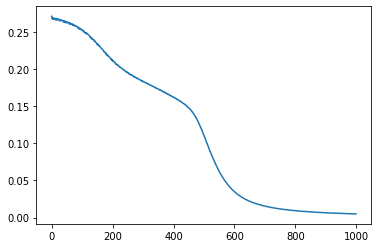

In [72]:
# 앞에 history라는 변수에 tf.keras가 학습을 진행한 내역을 저장했다.
# 여기에 저장되는 정보 중 loss를 불러와 그래프를 그려볼 수 있다.
plt.plot(history.history['loss'])
plt.show()

In [73]:
# 그래프를 통해 손실값이 감소하고 있음을 알 수 있다. (x축 = 학습횟수, y축 = loss)
# 이렇게 손실을 시각화하면 네트워크 학습 현황을 한눈에 파악할 수 있다.

In [74]:
# 참고로 plt.plot()에 하나의 변수만 전달하면 그 변수를 y로 간주하고, x는 자동으로 range(len(y))에 해당하는 값이 된다.
# --------------------------------------------------------------------------(즉, 학습횟수가 x로 자동 할당)

In [75]:
# 지금까지 tf.keras를 이용해 2-레이어 구조의 네트워크를 만드는 방법을 배웠다. 
# 또한 matplotlib.pyplot을 이용해 시각화함으로써 학습 결과를 확인할 수 있었다.

# 3.1 선형 회귀

In [76]:
# 머신러닝에서 '회귀'는 연속된 실숫값을 정확히 예측하는 것이 목적이다.

# 선형회귀(Linear Regression)는 데이터의 경향성을 설명하는 하나의 직선을 예측하는 것이다.
# 선형회귀에서 주로 사용되는 2차원에서의 직선이란 '기울기'와 'y절편'을 가지는 좌표 평면 위 점들의 집합이다.
# 선형회귀를 이용하면 키와 몸무게, 치킨 판매량과 맥주 판매량 등 2개의 데이터에 대한 경향성을 예측할 수 있다.

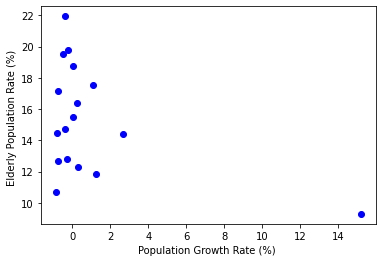

In [77]:
#  우리나라 지역별 '인구증가율'과 '고령인구비율'데이터를 통해 둘 사이에 어떤 경향성이 있는지 선형회귀로 예측해보자.
#  먼저 데이터를 한눈에 보기 위해서는 시각화가 필요하다.
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old, 'bo')
plt.xlabel('Population Growth Rate (%) ')
plt.ylabel('Elderly Population Rate (%) ')
plt.show()

In [78]:
# 오른쪽 아래에 치우쳐진 하나의 점이 눈에 띈다. 일반적인 경향에서 벗어나는 '극단치(Outlier)'인데, 이는 제거하는 것이 좋다.

In [79]:
# 하나의 직선과 각 데이터의 차이를 잔차(residual)라고 한다.
# 이런 잔차의 제곱을 최소화하는 알고리즘을 최소제곱법(Least Square Method)라고 한다.
# 최소제곱법으로 직선 y = ax + b의 a(기울기)와  b(y절편)을 구할 수 있다.

## 3.1.1 하드코딩으로 최소제곱법 구축

a: -0.355834147915461 b: 15.669317743971302


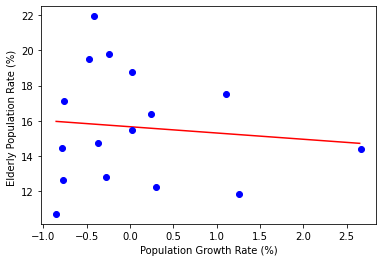

In [80]:
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균을 구합니다.
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a,b를 구합니다.
## for문은 시그마 구하기.
a = sum([(y - y_bar) * (x - x_bar) for y,x in list(zip(Y, X))])  # 분자
a /= sum([(x - x_bar) ** 2 for x in X])                          # 분모
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

# 그래프를 그리기 위해 회귀선의 x,y 데이터를 구합니다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선을 그립니다.
plt.plot(line_x, line_y, 'r-')

plt.plot(X,Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%) ')
plt.show()

In [81]:
# x값이 증가할 수록 y값은 감소하는 모습을 보인다.
# 즉, 인구증가율이 증가하면 고령인구비율은 감소한다는 것을 알 수 있다.
# 하나의 데이터가 증가할 때 다른 하나가 감소하면 '음의 상관관계'가 있다고 한다.

## 3.1.2 Tensorflow로 선형회귀 구축

99 a: 0.10979814 b: 6.890786 loss: 86.66466
199 a: -0.1262468 b: 11.342834 loss: 28.45584
299 a: -0.26203814 b: 13.901736 loss: 12.897902
399 a: -0.32451817 b: 15.079175 loss: 10.128263
499 a: -0.34733242 b: 15.509096 loss: 9.806416
599 a: -0.35396641 b: 15.634108 loss: 9.78204
699 a: -0.3555043 b: 15.663107 loss: 9.780842
799 a: -0.3557876 b: 15.668451 loss: 9.780805
899 a: -0.35582867 b: 15.669224 loss: 9.780804
999 a: -0.3558328 b: 15.669302 loss: 9.780805


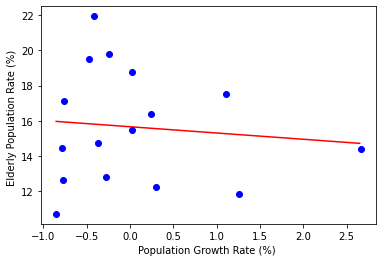

In [82]:
# 정의하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# 불러오기
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화합니다. -> 파라미터 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 구하는 함수입니다.  -> 손실값(loss) 구하기
## 잔차의 제곱을 모두 더해서 평균을 낸 값을 loss로 반환
def compute_loss():
  y_pred = a * X + b
  loss = tf.reduce_mean((Y - y_pred) ** 2)   # 기대출력(Y), 실제출력(y_pred)
  return loss                                # 잔차 = 기대출력 - 실제출력

  
# 최적화 함수(optimizer)는 복잡한 미분 계산 및 파라미터 업데이트를 자동으로 진행해주는 도구
# 여기서 보이는 Adam은 앞서 살펴봤던 SGD('확률적 경사하강법')와 함께 가장 많이 쓰이는 최적화 함수 중 하나
# lr(학습률)은 보통 0.1에서 0.0001 사이의 값을 사용
# 이러한 학습률(lr), 배치크기(batch_size)처럼 사용자가 임의로 지정해야 하는 값을 하이퍼파라미터(Hyperparameter)라고 함
optimizer = tf.keras.optimizers.Adam(lr=0.07)

for i in range(1000):
  # 잔차의 제곱의 평균을 최소화(minimize)합니다.
  optimizer.minimize(compute_loss, var_list=[a,b])
  # 첫 번째 인수에는 최소화할 손실을 전달, 두 번째 인수인 var_list에는 학습시킬 변수 리스트를 전달( 여기서는 당연히 a와 b를 넣는다.)
# 1000번의 학습을 거쳐 a와 b는 잔차의 제곱의 평균을 최소화하는 적절한 값에 도달한다!

  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다.
plt.plot(line_x, line_y, 'r-')
plt.plot(X,Y, 'bo')
plt.xlabel('Population Growth Rate (%) ')
plt.ylabel('Elderly Population Rate (%) ')
plt.show()



# 3.2 다항 회귀

In [83]:
# 비선형 회귀(Nonlinear Regression)는 선형 회귀로는 표현할 수 없는 데이터의 경향성을 설명하기 위한 회귀이다.
# 회귀선이 직선 대신 2차 함수, 3차 함수 등의 곡선이 된다.

## 3.2.1 이차함수

99 a: 3.9384642 b: -5.472634 loss: 72.34519
199 a: 2.8801794 b: -4.8183427 loss: 32.94587
299 a: 1.3817685 b: -2.5489771 loss: 16.71338
399 a: 0.39133263 b: -1.0094881 loss: 11.208219
499 a: -0.1496899 b: -0.16857198 loss: 9.786348
599 a: -0.4056229 b: 0.22917823 loss: 9.50461
699 a: -0.5109521 b: 0.3928674 loss: 9.4616375
799 a: -0.54872215 b: 0.4515662 loss: 9.456596
899 a: -0.5605159 b: 0.4698939 loss: 9.456144
999 a: -0.56370926 b: 0.4748571 loss: 9.456112


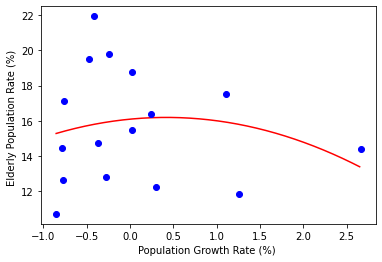

In [84]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a,b,c를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
  y_pred = a * X*X + b * X + c
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
  # 잔차의 제곱의 평균을 최소화(minimize)합니다.
  optimizer.minimize(compute_loss, var_list=[a,b,c])

  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 그래프를 그립니다.
plt.plot(line_x, line_y, 'r-')
plt.plot(X,Y, 'bo')
plt.xlabel('Population Growth Rate (%) ')
plt.ylabel('Elderly Population Rate (%) ')
plt.show()



In [85]:
# 결과를 살펴보면, 직선 회귀선보다 손실이 소량 감소한 사실을 확인할 수 있다.

## 3.2.2 삼차함수

99 a: -1.3885747 b: 6.1856437 loss: 55.8088
199 a: -1.9469373 b: 6.610192 loss: 28.42871
299 a: -1.4830747 b: 4.5529957 loss: 18.50813
399 a: -0.71317446 b: 2.152563 loss: 13.085817
499 a: -0.017266816 b: 0.12125066 loss: 10.207666
599 a: 0.5055082 b: -1.3846246 loss: 8.856228
699 a: 0.8626806 b: -2.4110546 loss: 8.297389
799 a: 1.0896162 b: -3.062942 loss: 8.093546
899 a: 1.2243614 b: -3.4499702 loss: 8.027946
999 a: 1.2991971 b: -3.6649144 loss: 8.00934


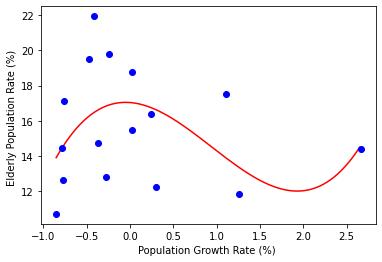

In [86]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a,b,c,d를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())


# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
  y_pred = a * X*X*X + b * X*X + c * X + d
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss


optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
  # 잔차의 제곱의 평균을 최소화(minimize)합니다.
  optimizer.minimize(compute_loss, var_list=[a,b,c,d])

  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 그래프를 그립니다.
plt.plot(line_x, line_y, 'r-')
plt.plot(X,Y, 'bo')
plt.xlabel('Population Growth Rate (%) ')
plt.ylabel('Elderly Population Rate (%) ')
plt.show()
